In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data file downloaded 02-27-18
# This will be the file used, data is from 11/1/15 to 2/20/18

# Assign filename
data_022718 = 'crime-datacrime-datacrimestat.csv'

# Read file in DataFrame
crime = pd.read_csv(data_022718, sep=',', low_memory=False, dtype={'ZIP': object})

# Quick view of the data
print(crime.head())
print(crime.info())

# Rename columns
crime.columns = ['incident_num', 'date_occurred_on', 'date_occurred_to', 'crime_cat', '100_block_addr', 'zip', 'premise_type']


        INC NUMBER        OCCURRED ON        OCCURRED TO   UCR CRIME CATEGORY  \
0  201600000052855  11/01/2015  00:00  01/09/2016  00:00  MOTOR VEHICLE THEFT   
1  201600000594484  11/01/2015  00:00                NaN                 RAPE   
2  201500002102327  11/01/2015  00:00  11/01/2015  09:00        LARCENY-THEFT   
3  201500002101405  11/01/2015  00:00  11/01/2015  05:00  MOTOR VEHICLE THEFT   
4  201500002102668  11/01/2015  00:00  11/01/2015  11:50  MOTOR VEHICLE THEFT   

             100 BLOCK ADDR    ZIP         PREMISE TYPE  
0  N 43RD AVE & W CACTUS RD  85029  SINGLE FAMILY HOUSE  
1         13XX E ALMERIA RD  85006  SINGLE FAMILY HOUSE  
2            51XX N 15TH ST  85014            APARTMENT  
3       102XX W MEDLOCK AVE  85307  SINGLE FAMILY HOUSE  
4            69XX W WOOD ST  85043  SINGLE FAMILY HOUSE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148468 entries, 0 to 148467
Data columns (total 7 columns):
INC NUMBER            148468 non-null object
OCCURRED O

In [2]:
# 4 variables have missing data: Occurred On, Occurred To, Zip, Premise Type
print(crime[['date_occurred_on', 'date_occurred_to', 'zip', 'premise_type']].isna().sum())
# 'date_occurred_to' field is blank because the victim knows the exact time the incident occurred and only the 'date_occurred_on' is populated

# Sum number of incidents where occurred_on and occurred_to are NaN
print(crime[(crime.date_occurred_on.isna()) & (crime.date_occurred_to.isna())])

# 
print(crime.loc[crime['zip'].isna()])
print(crime.loc[crime['date_occurred_on'].isna()].head())
print(crime.loc[crime['date_occurred_to'].isna()].head())
print(crime.loc[crime['premise_type'].isna()].head())

date_occurred_on      336
date_occurred_to    43719
zip                     3
premise_type          805
dtype: int64
Empty DataFrame
Columns: [incident_num, date_occurred_on, date_occurred_to, crime_cat, 100_block_addr, zip, premise_type]
Index: []
          incident_num   date_occurred_on   date_occurred_to      crime_cat  \
63037  201700001136425  11/04/2016  00:00  06/25/2017  00:00           RAPE   
79708  201700000206086  02/04/2017  10:00  02/04/2017  10:14  LARCENY-THEFT   
82276  201700000368400  02/18/2017  12:00  02/27/2017  15:23  LARCENY-THEFT   

             100_block_addr  zip             premise_type  
63037       451XX W RHEA RD  NaN                APARTMENT  
79708     XX W BASELINE AVE  NaN          SPECIALTY STORE  
82276  122XX N TABLE TOP RD  NaN  FENCED RESIDENTIAL YARD  
         incident_num date_occurred_on   date_occurred_to      crime_cat  \
248   201500002110561              NaN  11/02/2015  14:40        ROBBERY   
275   201500002132194              NaN  11

In [3]:
# Identify the unique values
print(crime[['crime_cat', 'zip', 'premise_type']].nunique())
print(crime.crime_cat.unique())
print(crime.zip.unique())
#print(crime.premise_type.unique())

crime_cat        9
zip             99
premise_type    94
dtype: int64
['MOTOR VEHICLE THEFT' 'RAPE' 'LARCENY-THEFT' 'DRUG OFFENSE' 'BURGLARY'
 'AGGRAVATED ASSAULT' 'MURDER AND NON-NEGLIGENT MANSLAUGHTER' 'ROBBERY'
 'ARSON']
['85029' '85006' '85014' '85307' '85043' '85017' '85085' '85019' '85031'
 '85027' '85024' '85339' '85028' '85018' '85015' '85008' '85254' '85051'
 '85023' '85009' '85044' '85035' '85041' '85003' '85048' '85353' '85016'
 '85022' '85033' '85040' '85007' '85050' '85004' '85054' '85032' '85013'
 '85034' '85042' '85021' '85012' '85053' '85308' '85086' '85020' '85037'
 '85331' '85306' '85083' '85310' '85045' '85087' '85301' '85253' '85304'
 '85255' '85251' '85258' '85225' '85363' '85282' '85268' '85213' '85395'
 '85202' '85201' '85381' '85281' '85210' '85323' '85224' '85345' '85302'
 '85266' '85382' '85392' '85303' '85260' '85286' '85296' '85203' '85248'
 '85295' '85290' '85326' '85234' '85283' '85215' '85226' '85257' '85305'
 nan '85383' '85204' '85337' '85396' '85338' '

In [4]:
# Cleaning the data set

# Remove missing zip code rows and convert to str
crime_clean = crime.drop(crime.index[[63037, 79708, 82276]])
print(crime_clean.loc[crime_clean['zip'].isna()])

# Fill in missing date values with date_occurred_on or date_occurred_to
crime_clean.date_occurred_on.fillna(crime_clean.date_occurred_to, inplace=True)
print(crime_clean.iloc[248])
crime_clean.date_occurred_to.fillna(crime_clean.date_occurred_on, inplace=True)
print(crime_clean.iloc[24])
print(crime_clean[['date_occurred_on', 'date_occurred_to']].isna().sum())

# Premise type NaN convert to Unknown
crime_clean.premise_type = crime_clean.premise_type.fillna('UNKNOWN')

# Convert date columns to datetime
crime_clean['date_occurred_on'] = pd.to_datetime(crime_clean['date_occurred_on'], format='%m/%d/%Y %H:%M')
crime_clean['date_occurred_to'] = pd.to_datetime(crime_clean['date_occurred_to'], format='%m/%d/%Y %H:%M')
crime_clean.info()

# Clean dataframe is called crime_clean

Empty DataFrame
Columns: [incident_num, date_occurred_on, date_occurred_to, crime_cat, 100_block_addr, zip, premise_type]
Index: []
incident_num                            201500002110561
date_occurred_on                      11/02/2015  14:40
date_occurred_to                      11/02/2015  14:40
crime_cat                                       ROBBERY
100_block_addr                       41XX W BASELINE RD
zip                                               85041
premise_type        STREET / ROADWAY / ALLEY / SIDEWALK
Name: 248, dtype: object
incident_num                   201500002100158
date_occurred_on             11/01/2015  00:05
date_occurred_to             11/01/2015  00:05
crime_cat                  MOTOR VEHICLE THEFT
100_block_addr             28XX W CAMELBACK RD
zip                                      85017
premise_type        CONVENIENCE MARKET / STORE
Name: 24, dtype: object
date_occurred_on    0
date_occurred_to    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int

# Exploratory Data Analysis

count            148465
unique                9
top       LARCENY-THEFT
freq              74883
Name: crime_cat, dtype: object

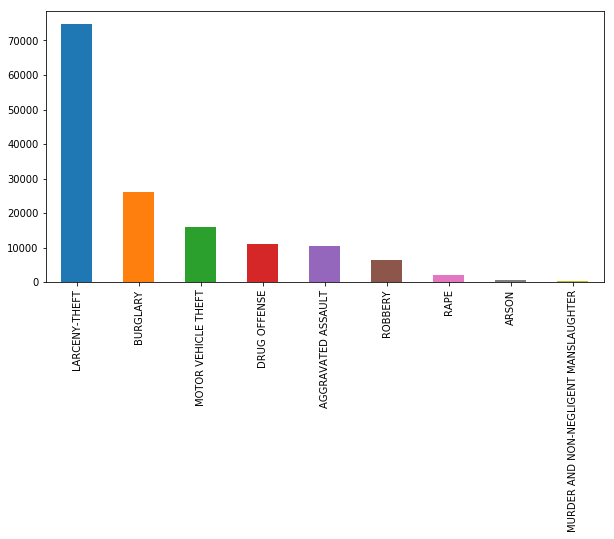

In [5]:
crime_clean['crime_cat'].value_counts().plot(kind='bar', figsize=(10,5))
crime_clean.crime_cat.describe()

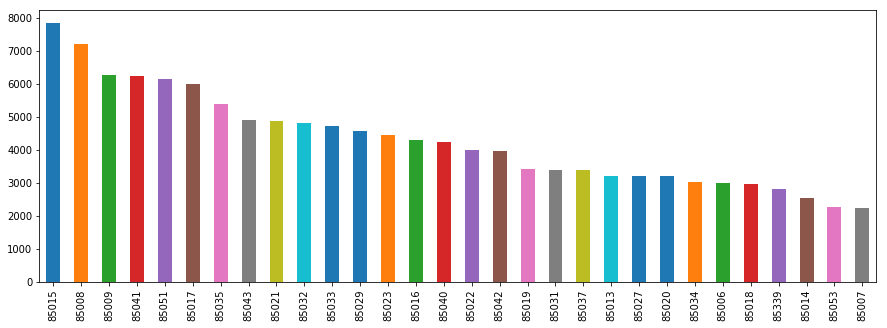

In [6]:
crime_clean['zip'].value_counts().head(30).plot(kind='bar', figsize=(15,5))

count                  148465
unique                     94
top       SINGLE FAMILY HOUSE
freq                    28011
Name: premise_type, dtype: object

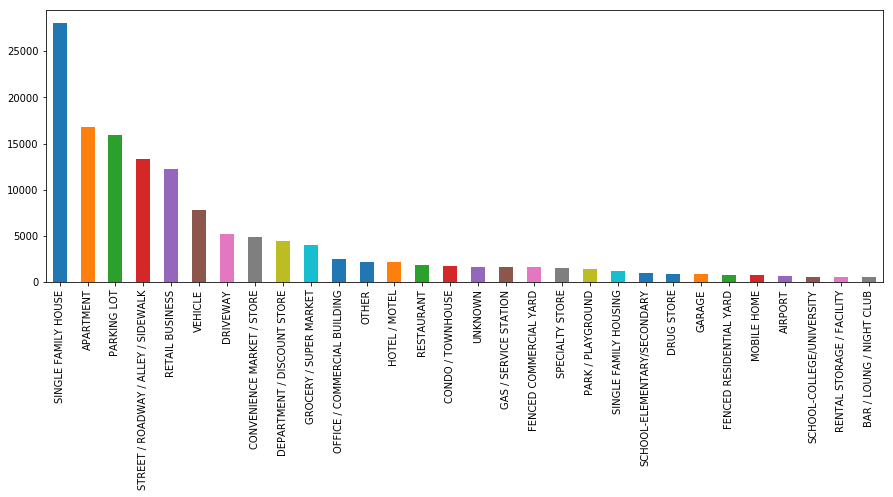

In [7]:
crime_clean['premise_type'].value_counts().head(30).plot(kind='bar', figsize=(15,5))
crime_clean.premise_type.describe()

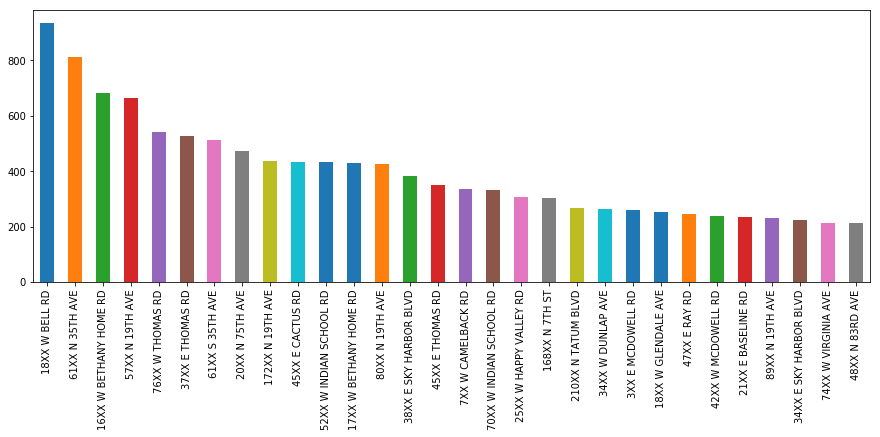

In [8]:
crime_clean['100_block_addr'].value_counts().head(30).plot(kind='bar', figsize=(15,5))

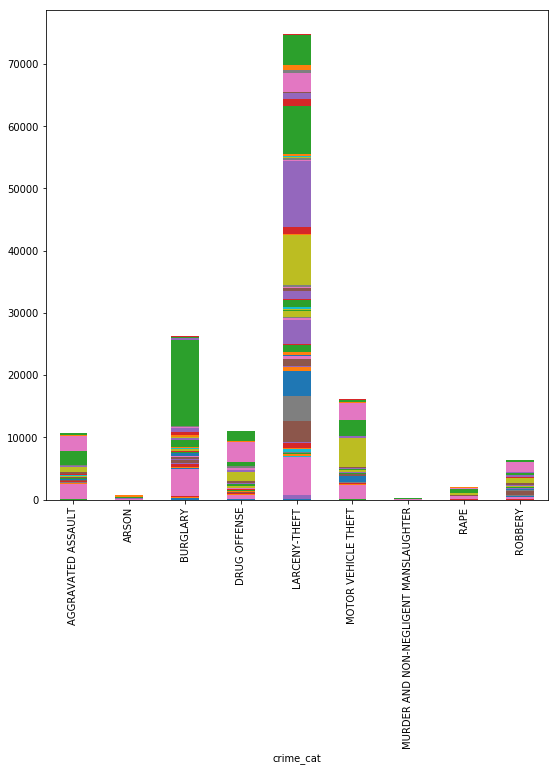

In [9]:
# Crosstab Two-Way Tables
crime_cat_premise_tab = pd.crosstab(index=crime_clean['crime_cat'], columns=crime_clean['premise_type'])
#print(crime_cat_premise_tab)

crime_cat_premise_tab.plot(kind='bar', figsize=(9,9), stacked=True, legend=False)

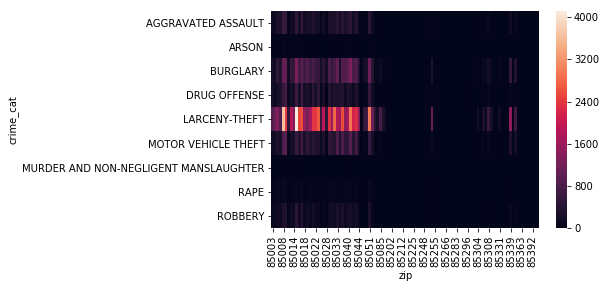

In [10]:
crime_cat_zip_tab = pd.crosstab(index=crime_clean['crime_cat'], columns=crime_clean['zip'])
crime_cat_zip_tab
sns.heatmap(crime_cat_zip_tab)
#crime_cat_zip_tab.plot(kind='bar', figsize=(8,8), stacked=True, legend=False)

In [11]:
# Market Basket Analysis

# Import mlxtend packages
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules


In [13]:
# Create basket list
basket = crime_clean[['crime_cat', 'zip', 'premise_type', '100_block_addr']].values.tolist()
type(basket)

list

In [14]:
# one-hot encode the data and frequent items
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
basket_encode = pd.DataFrame(te_ary, columns=te.columns_)
basket_encode.head()

,07A STOREROOM/SHED (COMMERCIAL),07A STOREROOM/SHED (RESIDENTIAL),100XX N 11TH AVE,100XX N 12TH ST,100XX N 13TH PL,100XX N 13TH ST,100XX N 14TH ST,100XX N 15TH AVE,100XX N 16TH DR,100XX N 17TH AVE,...,XX W VIRGINIA AVE,XX W VOGEL AVE,XX W WAGONER RD,XX W WASHINGTON AVE,XX W WASHINGTON ST,XX W WATKINS ST,XX W WICKIEUP LN,XX W WILLETTA ST,XX W WILSHIRE DR,XX W WINDSOR AVE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
frequent_itemsets = apriori(basket_encode, min_support=0.025, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.048631,[85008]
1,0.042192,[85009]
2,0.052800,[85015]
3,0.028977,[85016]
4,0.040454,[85017]
5,0.032823,[85021]
6,0.027016,[85022]
7,0.030054,[85023]
8,0.030856,[85029]
9,0.032452,[85032]


In [132]:
# Confidence Metric
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.025)
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LARCENY-THEFT),(85015),0.504382,0.052800,0.027784,0.055086,1.043288,0.001153,1.002419
1,(85015),(LARCENY-THEFT),0.052800,0.504382,0.027784,0.526215,1.043288,0.001153,1.046083
2,(APARTMENT),(BURGLARY),0.113246,0.177059,0.029408,0.259680,1.466633,0.009357,1.111602
3,(BURGLARY),(APARTMENT),0.177059,0.113246,0.029408,0.166090,1.466633,0.009357,1.063369
4,(APARTMENT),(LARCENY-THEFT),0.113246,0.504382,0.041586,0.367216,0.728052,-0.015533,0.783235
5,(LARCENY-THEFT),(APARTMENT),0.504382,0.113246,0.041586,0.082449,0.728052,-0.015533,0.966436
6,(BURGLARY),(SINGLE FAMILY HOUSE),0.177059,0.188671,0.092864,0.524480,2.779868,0.059458,1.706193
7,(SINGLE FAMILY HOUSE),(BURGLARY),0.188671,0.177059,0.092864,0.492199,2.779868,0.059458,1.620600
8,(DEPARTMENT / DISCOUNT STORE),(LARCENY-THEFT),0.029785,0.504382,0.027023,0.907282,1.798801,0.012000,5.345427
9,(LARCENY-THEFT),(DEPARTMENT / DISCOUNT STORE),0.504382,0.029785,0.027023,0.053577,1.798801,0.012000,1.025139


In [16]:
# Lift Metric
rules_1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules_1

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BURGLARY),(APARTMENT),0.177059,0.113246,0.029408,0.166090,1.466633,0.009357,1.063369
1,(APARTMENT),(BURGLARY),0.113246,0.177059,0.029408,0.259680,1.466633,0.009357,1.111602
2,(BURGLARY),(SINGLE FAMILY HOUSE),0.177059,0.188671,0.092864,0.524480,2.779868,0.059458,1.706193
3,(SINGLE FAMILY HOUSE),(BURGLARY),0.188671,0.177059,0.092864,0.492199,2.779868,0.059458,1.620600
4,(DEPARTMENT / DISCOUNT STORE),(LARCENY-THEFT),0.029785,0.504382,0.027023,0.907282,1.798801,0.012000,5.345427
5,(LARCENY-THEFT),(DEPARTMENT / DISCOUNT STORE),0.504382,0.029785,0.027023,0.053577,1.798801,0.012000,1.025139
6,(DRIVEWAY),(LARCENY-THEFT),0.035039,0.504382,0.026525,0.757017,1.500881,0.008852,2.039721
7,(LARCENY-THEFT),(DRIVEWAY),0.504382,0.035039,0.026525,0.052589,1.500881,0.008852,1.018524
8,(GROCERY / SUPER MARKET),(LARCENY-THEFT),0.027508,0.504382,0.025050,0.910627,1.805433,0.011175,5.545496
9,(LARCENY-THEFT),(GROCERY / SUPER MARKET),0.504382,0.027508,0.025050,0.049664,1.805433,0.011175,1.023314
